In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Priprema podataka

In [2]:
#Učitavanje podataka iz excel tablice
X = pd.read_csv('heart_disease_uci.csv')

#dimenzija excel tablice (920 primjera i 16 znacajki)
X.shape

(920, 16)

In [3]:
X.head()
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(X)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


## Monotoni atributi

In [4]:
# Broj jedinstvenih vrijednosti za svaki atribut
X.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [5]:
# "Id" i "dataset" su monotoni atributi s obzirom da imaju 920 jedinstvenih vrijednosti
# Znacajku "id" i "dataset" treba izbaciti jer nam ne daju nikakve korisne informacije
X.drop(('id'), axis=1, inplace=True) 
X.drop(('dataset'), axis=1, inplace=True) 

## Nedostajući podaci

In [6]:
# Broj nedostajucih (NaN) podataka
X.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
X_tmp = X.copy()

In [8]:
# trestbps - krvni tlak u mirovanju
# tip atributa - float (kontinuirani broj)

# whis_l = 120 - 1.5*20 = 90 
# whis_h = 140 + 1.5*20 = 170
# trestbps outliers < 90 i > 170
print('Trestbps < 94: ', (X_tmp.trestbps < 94).sum()) # --> stavljamo 94 jer tako piše u tablici 2 iz časopisa
print('Trestbps > 200: ', (X_tmp.trestbps > 200).sum())

Trestbps < 94:  3
Trestbps > 200:  0


In [9]:
X_tmp.loc[X_tmp.trestbps < 94, 'trestbps']

499    92.0
644    80.0
753     0.0
Name: trestbps, dtype: float64

In [10]:
# Izbacivanje 0 odnosno imamo neke krivo očitane podatka što kvari distribuciju:
X_tmp = X_tmp[~X_tmp['trestbps'].isin(X_tmp.loc[X_tmp.trestbps < 80, 'trestbps'])]

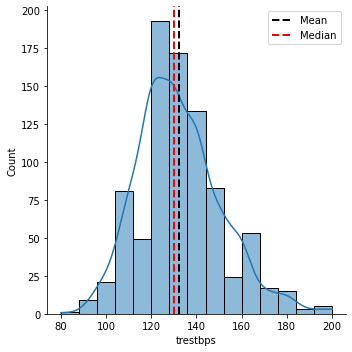

In [11]:
#distribucija

sns.displot(X_tmp.trestbps, kde=True, bins=15)
plt.axvline(X_tmp.trestbps.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(X_tmp.trestbps.median(), color='red', linestyle='dashed', linewidth=2, label='Median')

plt.legend()

In [12]:
#-------------------------------------------------------------------------------------------------------------------------------
# Nedostajeća mjerenja krvnog tlaka zamijenit ćemo srednjom vrijednošću jer se radi o realnom broju 
# Ne ćemo ih zamijeniti medianom jer se radi o donekle normalnoj distribuciji
# Moguće je izbacivanje nedostajućih podataka jer ih nema puno (6%)
# Izbacivanje te značajke nije opcija jer je značajka previše bitna - dobar indikator zdravlja pacijenta
# Interpolacija nema smisla jer ne estimiramo vrijednosti izmedu postojecih podataka
#-------------------------------------------------------------------------------------------------------------------------------
# ubaci srednju vrijednost krvnog tlaka tamo gdje nedostaje ta informacijab
X_tmp.loc[X_tmp.trestbps.isna(),'trestbps'] = X_tmp.loc[:,'trestbps'].median()

In [13]:
# chol - razina kolesterola u krvi
# tip atributa - float (kontinuirani broj)

# whis_l = 198 - 1.5*71 = 91.5 --> donja granica je postavljena na whis_l = 126 prema tablici 2 iz casopisa
# whis_h = 269 + 1.5*71 = 375.5
# chol outliers < 91.5 i > 375.5
print('Chol < 126: ', (X_tmp.chol < 126).sum())
print('Chol > 564: ', (X_tmp.chol > 564).sum())

Chol < 126:  175
Chol > 564:  1


In [14]:
X_tmp.loc[X_tmp.chol < 126, 'chol']

431    100.0
473     85.0
499    117.0
597      0.0
598      0.0
       ...  
818      0.0
819      0.0
822      0.0
839      0.0
840      0.0
Name: chol, Length: 175, dtype: float64

In [15]:
# Izbacivanje 0 jer razina kolesterola ne može biti 0 ni 564 odnosno imamo neke krivo očitane podatke što kvari distribuciju:
X_tmp = X_tmp[~X_tmp['chol'].isin(X_tmp.loc[X_tmp.chol < 126, 'chol'])]
X_tmp = X_tmp[~X_tmp['chol'].isin(X_tmp.loc[X_tmp.chol > 564, 'chol'])]

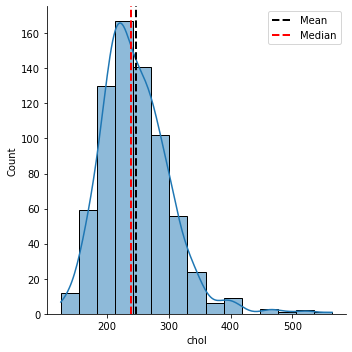

In [16]:
#distribucija
sns.displot(X_tmp.chol, kde=True, bins=15)
plt.axvline(X_tmp.chol.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(X_tmp.chol.median(), color='red', linestyle='dashed', linewidth=2, label='Median')

plt.legend()

In [17]:
#-------------------------------------------------------------------------------------------------------------------------------
# Nedostajeća mjerenja krvnog tlaka zamijenit ćemo medijanom umjesto srednjom vrijednošću jer je distribucija malo nakošena
# Moguce je izbacivanje nedostajućih podataka jer ih nema puno (3%)
# Izbacivanje te znacajke nije opcija jer je znacajka previše bitna - dobar indikator zdravlja pacijenta
# Interpolacija nema smisla jer ne estimiramo vrijednosti izmedu postojecih podataka
#-------------------------------------------------------------------------------------------------------------------------------
# ubaci medijan razine kolesterola tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp.chol.isna(),'chol'] = X_tmp.loc[:,'chol'].median()

# fbs - razina šećera u krvi natašte
# tip atributa - object
#-------------------------------------------------------------------------------------------------------------------------------
# Razinu secera u krvi nataste ne mozemo zamijenit srednjom vrijednoscu jer se ne radi o numerickoj vrijednosti
# Napravit cemo izbacivanje nedostajucih podataka (9.8%)
# Izbacivanje te znacajke nije opcija jer je znacajka bitna 
# Interpolacija nema smisla jer se ne radi o numerickoj vrijednosti
#-------------------------------------------------------------------------------------------------------------------------------
# izbaci zapise s nedostajućom vrijednosti značajke fbs
X_tmp = X_tmp.loc[X_tmp.fbs.notnull(), :]

# restecg - EKG u mirovanju
# tip atributa - object
#-------------------------------------------------------------------------------------------------------------------------------
# EKG nataste ne mozemo zamijeniti srednjom vrijednoscu jer se ne radi o numerickoj vrijednosti
# Napravit cemo izbacivanje nedostajucih podataka (0.2%)
# Izbacivanje te znacajke nije opcija jer je znacajka previse bitna 
# Interpolacija nema smisla jer se ne radi o numerickoj vrijednosti
#-------------------------------------------------------------------------------------------------------------------------------
# izbaci zapise s nedostajućom vrijednosti značajke fbs
X_tmp = X_tmp.loc[X_tmp.restecg.notnull(), :]

In [18]:
# thalch - maksimalni broj otkucaja srca postignut tijekom testa s talijem
# tip atributa - float

print('Thalch < 71: ', (X_tmp.thalch < 71).sum())
print('Thalch > 202: ', (X_tmp.thalch > 202).sum())

Thalch < 71:  1
Thalch > 202:  0


In [19]:
X_tmp.loc[X_tmp.thalch < 71, 'thalch']

800    69.0
Name: thalch, dtype: float64

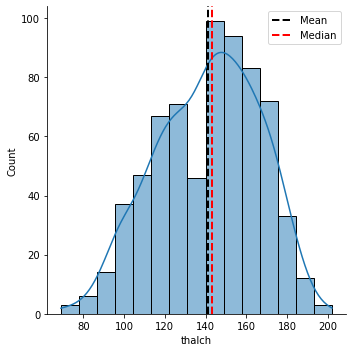

In [20]:
# Ne ćemo izbaciti vrijednost jer je samo jedna i nije previše udaljena od srednje vrijednosti i medijana

#distribucija
sns.displot(X_tmp.thalch, kde=True, bins=15)
plt.axvline(X_tmp.thalch.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(X_tmp.thalch.median(), color='red', linestyle='dashed', linewidth=2, label='Median')

plt.legend()

In [21]:
#-------------------------------------------------------------------------------------------------------------------------------
# Thalch cemo zamijeniti srednjom vrijednoscu jer se radi o realnoj varijabli
# Mozemo napraviti izbacivanje nedostajucih podataka jer ih nema previse (6%)
# Izbacivanje te znacajke nije opcija jer je znacajka bitna 
# Interpolacija nema smisla jer ne estimiramo vrijednosti izmedu postojecih podataka
#-------------------------------------------------------------------------------------------------------------------------------
# ubaci srednju vrijednost thalcha tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp.thalch.isna(),'thalch'] = X_tmp.loc[:,'thalch'].mean()

In [22]:
# oldpeak - pacijentovo stanje depresije
# tip atributa - float

print('Oldpeak < 0: ', (X_tmp.oldpeak < 0).sum())
print('Oldpeak > 6.2: ', (X_tmp.oldpeak > 6.2).sum())

Oldpeak < 0:  0
Oldpeak > 6.2:  0


In [23]:
X_tmp.loc[X_tmp.oldpeak < 0, 'oldpeak']

Series([], Name: oldpeak, dtype: float64)

In [24]:
X_tmp.loc[X_tmp.oldpeak > 6.2, 'oldpeak']

Series([], Name: oldpeak, dtype: float64)

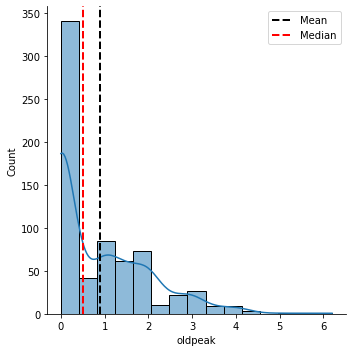

In [25]:
#distribucija
sns.displot(X_tmp.oldpeak, kde=True, bins=15)
plt.axvline(X_tmp.oldpeak.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(X_tmp.oldpeak.median(), color='red', linestyle='dashed', linewidth=2, label='Median')

plt.legend()

In [26]:
#-------------------------------------------------------------------------------------------------------------------------------
# Pacijentovo stanje depresije ćemo zamijeniti medijanom umjesto srednjom vrijednošću jer je distribucija jako nakošena u lijevo
# Mozemo napraviti izbacivanje nedostajucih podataka jer ih nema previse (6.7%)
# Izbacivanje te znacajke nije opcija jer je znacajka bitna 
# Interpolacija nema smisla jer ne estimiramo vrijednosti izmedu postojecih podataka
#-------------------------------------------------------------------------------------------------------------------------------
# ubaci medijan tamo gdje nedostaje ta informacija
X_tmp.loc[X_tmp.oldpeak.isna(),'oldpeak'] = X_tmp.loc[:,'oldpeak'].median()

# slope - stanje pacijenta tijekom najveceg tjelesnog opterecenja
# tip atributa - object
#-------------------------------------------------------------------------------------------------------------------------------
# slope ne mozemo zamijeniti srednjom vrijednoscu jer se ne radi o numerickom tipu podataka
# Ne mozemo napraviti izbacivanje nedostajucih podataka jer ih ima previse (33%)
# Izbacit cemo ovu znacajku 
# Interpolacija nema smisla jer se ne radi o numerickom tipu podataka
#-------------------------------------------------------------------------------------------------------------------------------
# izbaci stupac slope
X_tmp.drop(['slope'], axis=1, inplace=True)

# ca - rezultat fluoroskopije
# tip atributa - float
#-------------------------------------------------------------------------------------------------------------------------------
# Rezultat fluoroskopije ne mozemo zamijeniti srednjom vrijednoscu jer imamo previse nedostajucih podataka
# Ne mozemo napraviti izbacivanje nedostajucih podataka jer ih ima previse (66%)
# Izbacit cemo ovu znacajku 
# Interpolacija nema nikakvog smisla ovdje
#-------------------------------------------------------------------------------------------------------------------------------
# izbaci stupac ca
X_tmp.drop(['ca'], axis=1, inplace=True)

# thal - rezultat talijum testa
# tip atributa - object
#-------------------------------------------------------------------------------------------------------------------------------
# Rezultat fluoroskopije ne mozemo zamijeniti srednjom vrijednoscu jer se ne radi o numerickom tipu podataka
# Ne mozemo napraviti izbacivanje nedostajucih podataka jer ih ima previse (53%)
# Izbacit cemo ovu znacajku 
# Interpolacija nema smisla jer se ne radi o numerickom tipu podataka
#-------------------------------------------------------------------------------------------------------------------------------
# izbaci stupac thal
X_tmp.drop(['thal'], axis=1, inplace=True)

## Stršeće vrijednosti (outlieri)

#### Izbacivanje strsecih vrijednosti:
    whis_l - donja granica whiskera
    whis_h - gornja granica whiskera
    interkvartil := 3. kvartil - 1. kvartil
#### Formula za izracunavanje whiskersa (granica nakon kojih se pojavljuju strsece vrijednosti odnosno "outlieri"):
    whis_l = 1. kvartil - 1.5 * interkvartil
    whis_h = 3. kvartil + 1.5 * interkvartil

In [27]:
X_tmp.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,52.964481,132.695355,246.094262,141.180495,0.872951,0.842896
std,9.528636,17.276660,53.922685,24.290750,1.067903,1.110165
min,28.000000,94.000000,126.000000,69.000000,0.000000,0.000000
25%,46.000000,120.000000,211.000000,125.000000,0.000000,0.000000
50%,54.000000,130.000000,240.000000,141.180495,0.500000,0.000000
75%,59.000000,140.000000,274.250000,160.000000,1.500000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


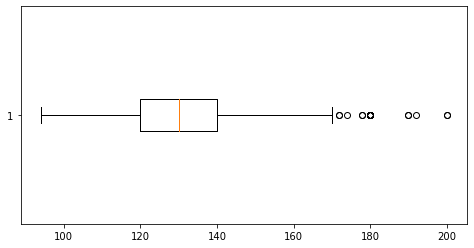

In [28]:
plt.figure(figsize=(8, 4)) 
plt.boxplot(X_tmp.trestbps, vert=False)
plt.show()

In [29]:
# whis_l = 120 - 1.5*20 = 90
# whis_h = 140 + 1.5*20 = 170
# trestbps outliers < 90 i > 170
print('Trestbps < 94: ', (X_tmp.trestbps < 94).sum()) # --> 94 je min. vrijednost bps-a iz tablice 2 iz casopisa
print('Trestbps > 170: ', (X_tmp.trestbps > 170).sum())

Trestbps < 94:  0
Trestbps > 170:  20


In [30]:
X_tmp.loc[X_tmp.trestbps > 170, 'trestbps']

14     172.0
83     180.0
126    200.0
172    174.0
183    178.0
188    192.0
201    180.0
213    178.0
231    180.0
338    190.0
375    180.0
387    180.0
475    180.0
484    180.0
548    200.0
569    180.0
595    180.0
854    172.0
889    180.0
896    190.0
Name: trestbps, dtype: float64

In [31]:
# Izbacivanje tih vrijednosti:
X_tmp = X_tmp[~X_tmp['trestbps'].isin(X_tmp.loc[X_tmp.trestbps > 170, 'trestbps'])]

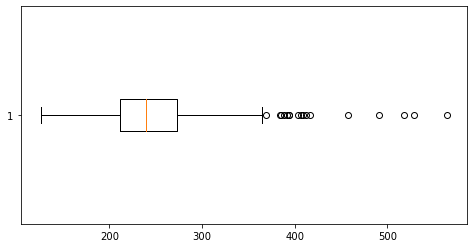

In [32]:
plt.figure(figsize=(8, 4)) 
plt.boxplot(X_tmp.chol, vert=False)
plt.show()

In [33]:
# whis_l = 211 - 1.5*63 = 116.5
# whis_h = 274.25 + 1.5*63 = 368.75
# chol outliers < 116.5 i > 368.75
print('Chol < 126: ', (X_tmp.chol < 126).sum()) # --> donja granica je postavljena na whis_l = 126 prema tablici 2 iz casopisa
print('Chol > 368.75: ', (X_tmp.chol > 368.75).sum())

Chol < 126:  0
Chol > 368.75:  17


In [34]:
X_tmp.loc[X_tmp.chol > 368.75, 'chol']

48     417.0
121    407.0
152    564.0
173    394.0
181    409.0
373    412.0
461    394.0
528    529.0
531    392.0
566    404.0
568    518.0
576    388.0
584    491.0
800    458.0
802    384.0
881    369.0
918    385.0
Name: chol, dtype: float64

In [35]:
# Izbacivanje tih vrijednosti:
X_tmp = X_tmp[~X_tmp['chol'].isin(X_tmp.loc[X_tmp.chol > 368.75, 'chol'])]

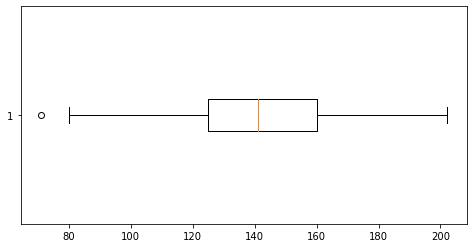

In [36]:
plt.figure(figsize=(8, 4)) 
plt.boxplot(X_tmp.thalch, vert=False)
plt.show()

In [37]:
# whis_l = 125 - 1.5*35 = 72.5 
# whis_h = 160 + 1.5*35 = 212.5
# thalch outliers < 72.5 i > 212.5
print('Thalch < 72.5: ', (X_tmp.thalch < 72.5).sum()) #--> donja granica je postavljena na whis_l = 71 prema tablici 2 iz casopisa
print('Thalch > 212.5: ', (X_tmp.thalch > 212.5).sum())

Thalch < 72.5:  1
Thalch > 212.5:  0


In [38]:
X_tmp.loc[X_tmp.thalch < 72.5, 'thalch']

245    71.0
Name: thalch, dtype: float64

In [39]:
# Izbacivanje te vrijednosti:
X_tmp = X_tmp[~X_tmp['thalch'].isin(X_tmp.loc[X_tmp.thalch < 72.5, 'thalch'])]

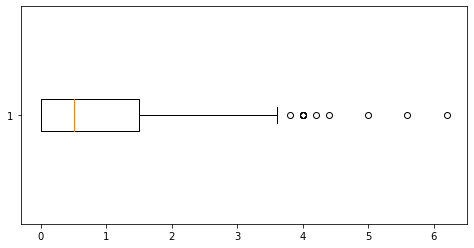

In [40]:
plt.figure(figsize=(8, 4)) 
plt.boxplot(X_tmp.oldpeak, vert=False)
plt.show()

In [41]:
# whis_l = 0 - 1.5*1.5 = -2.25 
# whis_h = 1.5 + 1.5*1.5 = 3.75
# chol outliers < 91.5 i > 3.75
print('Oldpeak < 0: ', (X_tmp.oldpeak < 0).sum()) # --> donja granica je postavljena na whis_l = 0 prema tablici 2 iz casopisa 
print('Oldpeak > 3.75: ', (X_tmp.oldpeak > 3.75).sum())

Oldpeak < 0:  0
Oldpeak > 3.75:  12


In [42]:
X_tmp.loc[X_tmp.oldpeak > 3.75, 'oldpeak']

91     6.2
123    5.6
191    4.2
211    3.8
285    4.4
293    4.0
567    4.0
589    5.0
804    4.0
825    4.0
841    4.0
863    4.0
Name: oldpeak, dtype: float64

In [43]:
# Izbacivanje tih vrijednosti:
X_tmp = X_tmp[~X_tmp['oldpeak'].isin(X_tmp.loc[X_tmp.oldpeak > 3.75, 'oldpeak'])]

In [44]:
X_tmp.reset_index(inplace=True)
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(X_tmp)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.000000,False,2.3,0
1,1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.000000,True,1.5,2
2,2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.000000,True,2.6,1
3,3,37,Male,non-anginal,130.0,250.0,False,normal,187.000000,False,3.5,0
4,4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.000000,False,1.4,0
5,5,56,Male,atypical angina,120.0,236.0,False,normal,178.000000,False,0.8,0
6,6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.000000,False,3.6,3
7,7,57,Female,asymptomatic,120.0,354.0,False,normal,163.000000,True,0.6,0
8,8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.000000,False,1.4,2
9,9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.000000,True,3.1,1


In [45]:
X_tmp.describe()

,index,age,trestbps,chol,thalch,oldpeak,num
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,401.700880,52.718475,131.002933,240.709677,141.699063,0.795455,0.790323
std,267.866918,9.547158,15.282941,45.185253,24.025718,0.949067,1.066797
min,0.000000,28.000000,94.000000,126.000000,80.000000,0.000000,0.000000
25%,180.500000,46.000000,120.000000,210.000000,125.000000,0.000000,0.000000
50%,363.500000,54.000000,130.000000,239.000000,141.180495,0.500000,0.000000
75%,553.750000,59.000000,140.000000,270.000000,160.000000,1.500000,1.000000
max,919.000000,77.000000,170.000000,365.000000,202.000000,3.600000,4.000000


## Transformacija atributa u numeričke vrijednosti

In [46]:
# Sve atribute treba transfomirati u numericke vrijednosti kako bi mogli iskoristiti te podatke
X_tmp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     682 non-null    int64  
 1   age       682 non-null    int64  
 2   sex       682 non-null    object 
 3   cp        682 non-null    object 
 4   trestbps  682 non-null    float64
 5   chol      682 non-null    float64
 6   fbs       682 non-null    object 
 7   restecg   682 non-null    object 
 8   thalch    682 non-null    float64
 9   exang     639 non-null    object 
 10  oldpeak   682 non-null    float64
 11  num       682 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 64.1+ KB


In [47]:
X_tmp['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [48]:
# Moramo promijeniti format znacajke "sex" u numericku vrijednost kako bi mogli te podatke koristiti za predikciju
le = LabelEncoder()
le.fit(X_tmp.loc[:,'sex'])

X_tmp.loc[:,'sex'] = le.transform(X_tmp.loc[:,'sex'])

In [49]:
X_tmp['fbs'].unique()

array([True, False], dtype=object)

In [50]:
# Moramo promijeniti format znacajke "fbs" u numericku vrijednost kako bi mogli te podatke koristiti za predikciju
le.fit(X_tmp.loc[:,'fbs'])
X_tmp.loc[:,'fbs'] = le.transform(X_tmp.loc[:,'fbs'])

In [51]:
X_tmp['exang'].unique()

array([False, True, nan], dtype=object)

In [52]:
le.fit(X_tmp.loc[:,'exang'])
X_tmp.loc[:,'exang'] = le.transform(X_tmp.loc[:,'exang'])

In [53]:
X_tmp['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [54]:
# Moramo promijeniti format znacajke "cp" u numericku vrijednost kako bi mogli te podatke koristiti za predikciju
replacement_dict = {}
i = 0
for value in X_tmp['cp']:    
    if 'asymptomatic' == value:
        replacement_dict[value] = 0 
    if 'atypical angina' == value:
        replacement_dict[value] = 1
    if 'non-anginal' == value:
        replacement_dict[value] = 2
    if 'typical angina' == value:
        replacement_dict[value] = 3
    i = i+1   

X_tmp['cp'] = X_tmp['cp'].replace(replacement_dict)

In [55]:
X_tmp['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [56]:
# Moramo promijeniti format znacajke "restecg" u numericku vrijednost kako bi mogli te podatke koristiti za predikciju 
replacement_dict = {}
i = 0
for value in X_tmp['restecg']:    
    if  'lv hypertrophy' == value:
        replacement_dict[value] = 0 
    if  'normal' == value:
        replacement_dict[value] = 1
    if 'st-t abnormality' == value:
        replacement_dict[value] = 2
    i = i+1   

X_tmp['restecg'] = X_tmp['restecg'].replace(replacement_dict)

In [57]:
# Vrijednosti Target atributa smiju bit samo 0 ili 1. Zato cemo vrijednosti vece od 1 postaviti na vrijednost 1
X_tmp['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [58]:
replacement_dict = {}
i = 0
for value in X_tmp['num']:    
    if value > 0:
        replacement_dict[value] = 1
    if value < 1:
        replacement_dict[value] = 0
        
X_tmp['num'] = X_tmp['num'].replace(replacement_dict)

In [59]:
X_tmp.reset_index(inplace=True)

# Maknut level_0 i index atribute koji se stvorio kada sam resetirao indexiranje vrijednosti zasebnih znacajki
X_tmp.drop(('level_0'), axis=1, inplace=True)
X_tmp.drop(('index'), axis=1, inplace=True)

with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(X_tmp)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,3,145.0,233.0,1,0,150.000000,0,2.3,0
1,67,1,0,160.0,286.0,0,0,108.000000,1,1.5,1
2,67,1,0,120.0,229.0,0,0,129.000000,1,2.6,1
3,37,1,2,130.0,250.0,0,1,187.000000,0,3.5,0
4,41,0,1,130.0,204.0,0,0,172.000000,0,1.4,0
5,56,1,1,120.0,236.0,0,1,178.000000,0,0.8,0
6,62,0,0,140.0,268.0,0,0,160.000000,0,3.6,1
7,57,0,0,120.0,354.0,0,1,163.000000,1,0.6,0
8,63,1,0,130.0,254.0,0,0,147.000000,0,1.4,1
9,53,1,0,140.0,203.0,1,0,155.000000,1,3.1,1


In [60]:
"""
for i in range(1,200):
    age = random.randint(29,77)
    sex = random.randint(0,1)
    cp = random.randint(0,3)
    trestbps = random.randint(94, 200)
    chol = random.randint(126, 564)
    fbs = random.randint(0,1)
    restecg = random.randint(0,2)
    thalch = random.randint(71,202)
    exang = random.randint(0,1)
    oldpeak = random.uniform(0.0,6.2)
    num = random.randint(0,1)
    
    X_tmp.loc[len(X_tmp.index)] = [age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, num]
"""   


'\nfor i in range(1,200):\n    age = random.randint(29,77)\n    sex = random.randint(0,1)\n    cp = random.randint(0,3)\n    trestbps = random.randint(94, 200)\n    chol = random.randint(126, 564)\n    fbs = random.randint(0,1)\n    restecg = random.randint(0,2)\n    thalch = random.randint(71,202)\n    exang = random.randint(0,1)\n    oldpeak = random.uniform(0.0,6.2)\n    num = random.randint(0,1)\n    \n    X_tmp.loc[len(X_tmp.index)] = [age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, num]\n'

In [61]:
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(X_tmp)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,3,145.0,233.0,1,0,150.000000,0,2.3,0
1,67,1,0,160.0,286.0,0,0,108.000000,1,1.5,1
2,67,1,0,120.0,229.0,0,0,129.000000,1,2.6,1
3,37,1,2,130.0,250.0,0,1,187.000000,0,3.5,0
4,41,0,1,130.0,204.0,0,0,172.000000,0,1.4,0
5,56,1,1,120.0,236.0,0,1,178.000000,0,0.8,0
6,62,0,0,140.0,268.0,0,0,160.000000,0,3.6,1
7,57,0,0,120.0,354.0,0,1,163.000000,1,0.6,0
8,63,1,0,130.0,254.0,0,0,147.000000,0,1.4,1
9,53,1,0,140.0,203.0,1,0,155.000000,1,3.1,1


### Korelacijska matrica

In [62]:
X_tmp.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
age,1.000000,0.063108,-0.077087,0.236742,0.088789,0.240685,-0.049505,-0.372461,0.271833,0.258542,0.310655
sex,0.063108,1.000000,-0.133605,0.067647,-0.060332,0.096193,0.026328,-0.130495,0.230600,0.132900,0.305411
cp,-0.077087,-0.133605,1.000000,-0.018293,-0.105530,0.009788,-0.025928,0.302526,-0.259853,-0.208760,-0.389112
trestbps,0.236742,0.067647,-0.018293,1.000000,0.045013,0.151845,0.009804,-0.113353,0.096968,0.192264,0.158898
chol,0.088789,-0.060332,-0.105530,0.045013,1.000000,0.027277,-0.098614,-0.029214,0.076791,0.053496,0.113109
fbs,0.240685,0.096193,0.009788,0.151845,0.027277,1.000000,0.039506,-0.082802,0.152138,0.031107,0.161478
restecg,-0.049505,0.026328,-0.025928,0.009804,-0.098614,0.039506,1.000000,-0.115154,0.184888,-0.076614,-0.002080
thalch,-0.372461,-0.130495,0.302526,-0.113353,-0.029214,-0.082802,-0.115154,1.000000,-0.313857,-0.265497,-0.367678
exang,0.271833,0.230600,-0.259853,0.096968,0.076791,0.152138,0.184888,-0.313857,1.000000,0.299441,0.432382
oldpeak,0.258542,0.132900,-0.208760,0.192264,0.053496,0.031107,-0.076614,-0.265497,0.299441,1.000000,0.448846


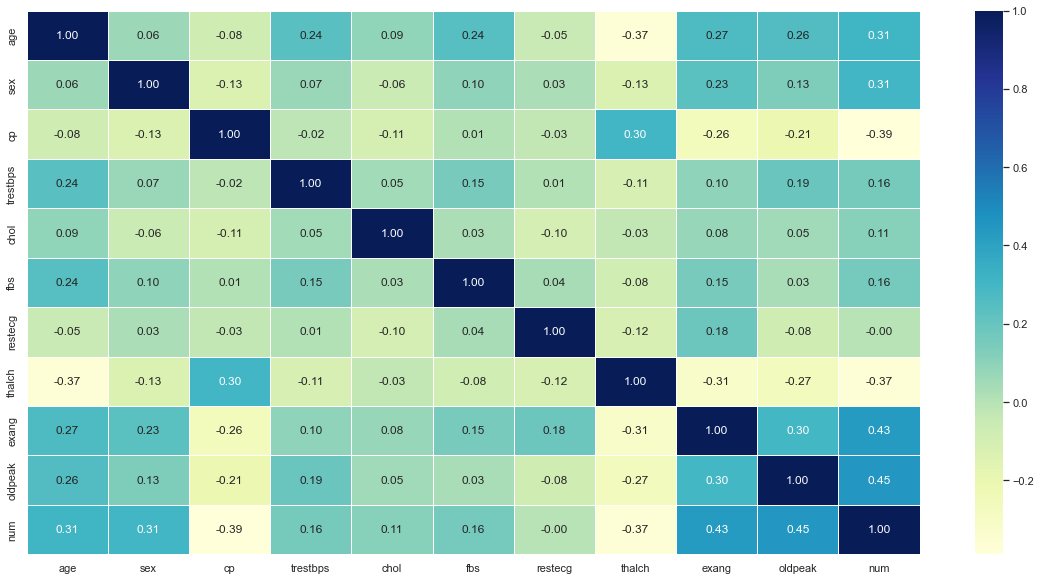

In [63]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_tmp.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Vidimo da nema korelacije između para značajki jer im koeficijent nije veći ili jednak od 0.9. Ne moramo odbaciti niti jednu značajku jer nisu redundantne.

# Vizualizacija podataka

### Dob pacijenata u ovisnosti o spolu

In [64]:
X_tmp_sex = X_tmp.groupby('sex').describe().transpose()
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)
display(X_tmp_sex)

sex                      0           1
age      count  163.000000  519.000000
         mean    51.644172   53.055877
         std      9.348982    9.592607
         min     30.000000   28.000000
         25%     45.000000   46.000000
         50%     51.000000   54.000000
         75%     58.000000   59.000000
         max     76.000000   77.000000
cp       count  163.000000  519.000000
         mean     1.098160    0.797688
         std      0.910940    0.964382
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      2.000000    2.000000
         max      3.000000    3.000000
trestbps count  163.000000  519.000000
         mean   129.159509  131.581888
         std     15.570995   15.160293
         min     94.000000   94.000000
         25%    120.000000  120.000000
         50%    130.000000  130.000000
         75%    140.000000  140.000000
         max    170.000000  170.000000
chol     count  163.000000  519.000000
         mean   245.570552  239.183044
         std     47.601869   44.336803
         min    141.000000  126.000000
         25%    209.500000  210.000000
         50%    240.000000  237.000000
         75%    276.500000  268.000000
         max    360.000000  365.000000
fbs      count  163.000000  519.000000
         mean     0.098160    0.181118
         std      0.298447    0.385487
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      0.000000    0.000000
         max      1.000000    1.000000
restecg  count  163.000000  519.000000
         mean     0.895706    0.934489
         std      0.604648    0.636370
         min      0.000000    0.000000
         25%      1.000000    1.000000
         50%      1.000000    1.000000
         75%      1.000000    1.000000
         max      2.000000    2.000000
thalch   count  163.000000  519.000000
         mean   147.289451  139.943316
         std     22.394776   24.271464
         min     90.000000   80.000000
         25%    130.500000  122.500000
         50%    150.000000  141.180495
         75%    163.000000  158.000000
         max    192.000000  202.000000
exang    count  163.000000  519.000000
         mean     0.208589    0.539499
         std      0.422427    0.641156
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      0.000000    1.000000
         max      2.000000    2.000000
oldpeak  count  163.000000  519.000000
         mean     0.570552    0.866089
         std      0.773794    0.987922
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.500000
         75%      1.000000    1.500000
         max      3.600000    3.600000
num      count  163.000000  519.000000
         mean     0.190184    0.547206
         std      0.393656    0.498247
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    1.000000
         75%      0.000000    1.000000
         max      1.000000    1.000000

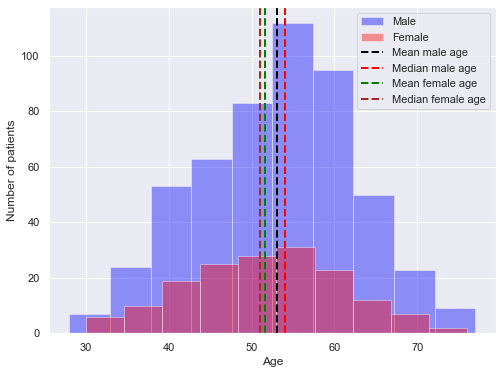

In [65]:
male_age = X_tmp.groupby('sex').age.get_group(1)
female_age = X_tmp.groupby('sex').age.get_group(0)

plt.figure(figsize=(8, 6)) 
plt.hist(male_age, bins=10, color='blue', alpha=0.4, label='Male')
plt.hist(female_age, bins=10, color='red', alpha=0.4, label='Female')

plt.xlabel('Age')
plt.ylabel('Number of patients')

plt.axvline(male_age.mean(), color='black', linestyle='dashed', linewidth=2, label = 'Mean male age')
plt.axvline(male_age.median(), color='red', linestyle='dashed', linewidth=2, label = 'Median male age')
plt.axvline(female_age.mean(), color='green', linestyle='dashed', linewidth=2, label = 'Mean female age')
plt.axvline(female_age.median(), color='brown', linestyle='dashed', linewidth=2, label = 'Median female age')

plt.legend(loc='best')
plt.show()

Iz grafa možemo zaključiti nekoliko stvari:
- pacijenti su pretežito muškog spola
- prosječna dob oba spola je 50-ak godina
- pacijenti muškog spola su u prosjeku par godina stariji od ženskog spola

### Udio pacijenata s mogućnosti otkazivanja srca za svaki spol

In [66]:
hf = pd.crosstab(X_tmp['num'], X_tmp['sex'])
hf # hf - heart failure

sex,0,1
num,,
0,132,235
1,31,284


([<matplotlib.patches.Wedge at 0x222b3fd4310>,
 [Text(-1.0955399423017866, 0.09895572151926407, 'No chance for female hf'),
  Text(-0.8684730244326059, -0.6750959974943435, 'High chance for female hf'),
  Text(0.3410964448286541, -1.045778760219031, 'No chance for male hf'),
  Text(0.4641146242090076, 0.9972951496900663, 'High chance for male hf')],
 [Text(-0.59756724125552, 0.053975848101416764, '19.4%'),
  Text(-0.4737125587814213, -0.36823418045146, '4.5%'),
  Text(0.18605260627017492, -0.5704247783012895, '34.5%'),
  Text(0.2531534313867314, 0.5439791725582179, '41.6%')])

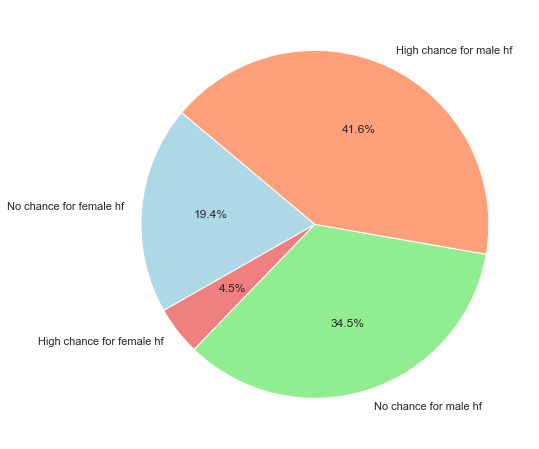

In [67]:
# Tortni grafikon
labels = ['No chance for female hf', 'High chance for female hf', 'No chance for male hf', 'High chance for male hf']
sizes = [hf[0][0], hf[0][1], hf[1][0], hf[1][1]]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8, 8))  # Set the figure size

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

Iz tortnog grafikona možemo zaključiti da muškarci imaju puno veću šansu zatajenja srca od žena. 

### Dijagram raspršenosti (heartbeat / age / num)

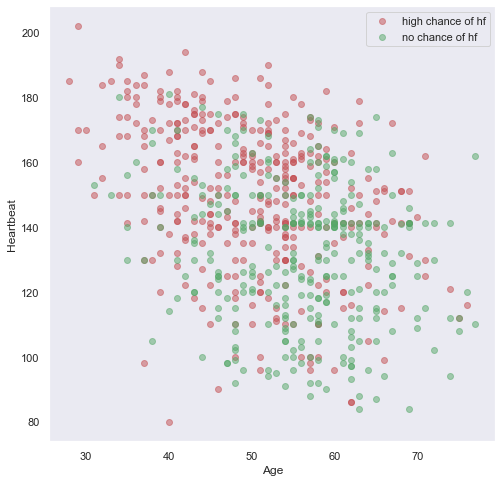

In [68]:

mask_hf = X_tmp.num == 1

# plot
plt.figure(figsize=(8, 8))
plt.scatter(X_tmp.loc[~mask_hf,'age'], X_tmp.loc[~mask_hf,'thalch'], alpha=0.5, c='r', label='high chance of hf')
plt.scatter(X_tmp.loc[mask_hf,'age'], X_tmp.loc[mask_hf,'thalch'], alpha=0.5, c='g', label='no chance of hf')
plt.xlabel('Age')
plt.ylabel('Heartbeat')
plt.legend(loc='best')
plt.grid()
plt.show()

Iz dijagrama raspršenosti možemo zaključit sljedeće:
1. Puno više ljudi umire ako osobe imaju veći broj otkucaja srca
2. Još veće su šanse od zatajenja srca ako je osoba starija i ima veći broj otkucaja srca
3. Najveći broj ljudi koji umiru od zatajenja srca su osobe između 35 i 60 godina

### Posloženi dijagram 

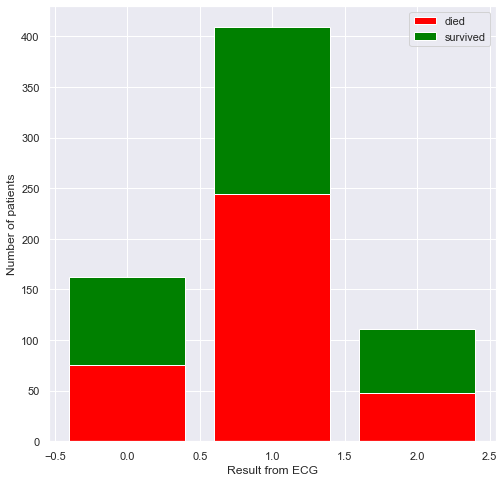

In [69]:
# mask
mask_survived = X_tmp.num == 1

count_per_restecg_died = X_tmp.loc[~mask_survived,:].groupby('restecg').count().loc[:,'age'].values
count_per_restecg_survived = X_tmp.loc[mask_survived,:].groupby('restecg').count().loc[:,'age'].values
restecg_values = X_tmp.groupby('restecg').count().index.values

# plot
plt.figure(figsize=(8, 8))
plt.bar(restecg_values, count_per_restecg_died, color='red', label='died')
plt.bar(restecg_values, count_per_restecg_survived, color='green', label='survived', bottom=count_per_restecg_died)
plt.legend(loc='best')
plt.xlabel('Result from ECG')
plt.ylabel('Number of patients')
plt.show()

Rezultati s ECG-a predstavljaju nivo boli:
   - lv hypertrophy = 0 
   - normal = 1
   - st-t abnormality = 2
   
Dijagram nam ne daje baš previše informacija jer ispada da je veća vjerojatnost da neko umre s normalnim rezultatom ECG-a nego s abnormalnim. Možemo vidjeti s dijagrama da najveći broj prijavljenih pacijenata ima normalan ECG.

# Replikacija rezultata

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score, matthews_corrcoef
from sklearn import svm, metrics
from matplotlib.pyplot import figure

# odvajanje oznake klase
X = X_tmp.loc[:, X_tmp.columns != 'num']
y = X_tmp.loc[:, 'num']

# razdvoji podatke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Decision Tree classifier

Točnost:  0.7241901108269395  +-  0.09353177798624866
Accuracy of the Decision Tree algorithm is: 0.7664233576642335
Confusion matrix:
 [[58 15]
 [17 47]]
Precision Score :  0.7664233576642335
Recall Score :  0.7664233576642335
F1_score:  0.7664233576642334


              precision    recall  f1-score   support

           0       0.77      0.79      0.78        73
           1       0.76      0.73      0.75        64

    accuracy                           0.77       137
   macro avg       0.77      0.76      0.76       137
weighted avg       0.77      0.77      0.77       137



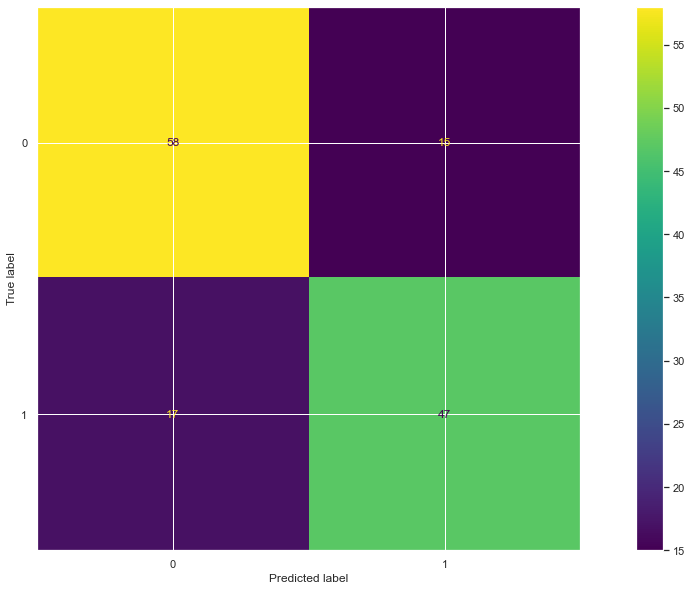

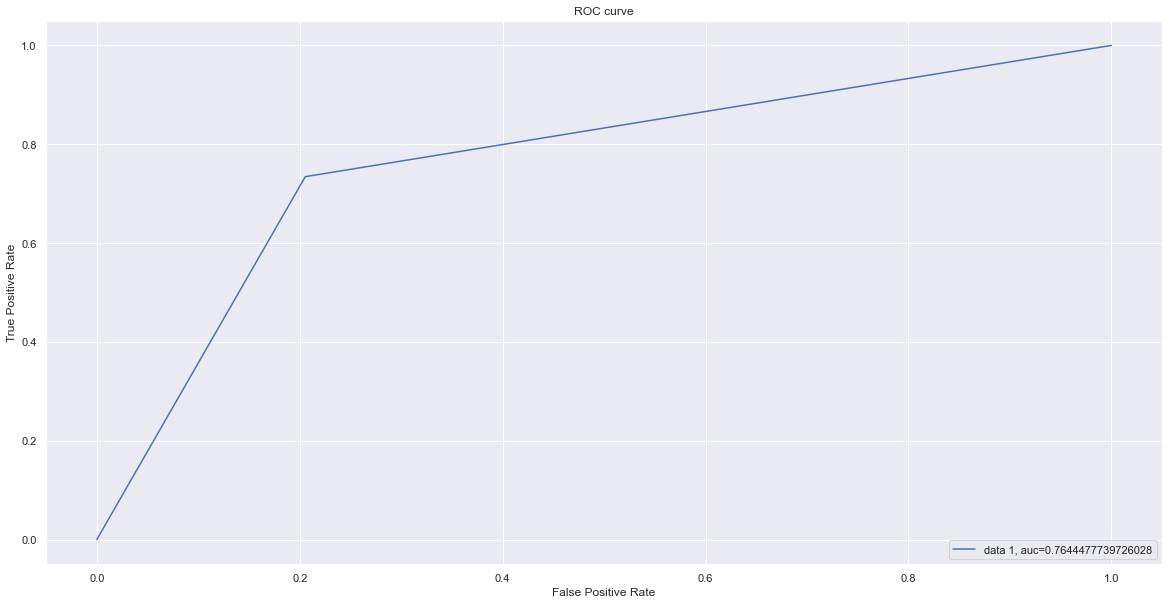

In [71]:
def DT_Classifier(X_train, X_test, y_train, y_test):

    # instanciraj i treniraj model 
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ######## Preporučeni način validiranja modela je korištenjem unakrsne provjere ########
    # unakrsna valicadija
    scores = cross_val_score(model, X, y, cv=10)
    
    # evaluiraj model
    print('Točnost: ', scores.mean(), ' +- ', scores.std())
    
    # izračun točnosti modela
    print('Accuracy of the Decision Tree algorithm is: {}'.format(accuracy_score(y_test,y_pred)))
    
    # matrica zabune
    print('Confusion matrix:\n {}'.format(confusion_matrix(y_test,y_pred)))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    # Pojedinačni prikaz metrika
    print("Precision Score : ",precision_score(y_test,y_pred,average='micro'))
    print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))
    print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
    print("\n")
    
    # classification report
    print(classification_report(y_test,y_pred))
    
    # ROC krivulja
    figure()
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
# pozovi definiranu funkciju
DT_Classifier(X_train, X_test, y_train, y_test)

### Naive Bayes classifier

Točnost:  0.7858908780903666  +-  0.10913336470139517
Accuracy of the Decision Tree algorithm is: 0.8394160583941606
Confusion matrix:
 [[66  7]
 [15 49]]
Precision Score :  0.8394160583941606
Recall Score :  0.8394160583941606
F1_score:  0.8394160583941606


              precision    recall  f1-score   support

           0       0.81      0.90      0.86        73
           1       0.88      0.77      0.82        64

    accuracy                           0.84       137
   macro avg       0.84      0.83      0.84       137
weighted avg       0.84      0.84      0.84       137



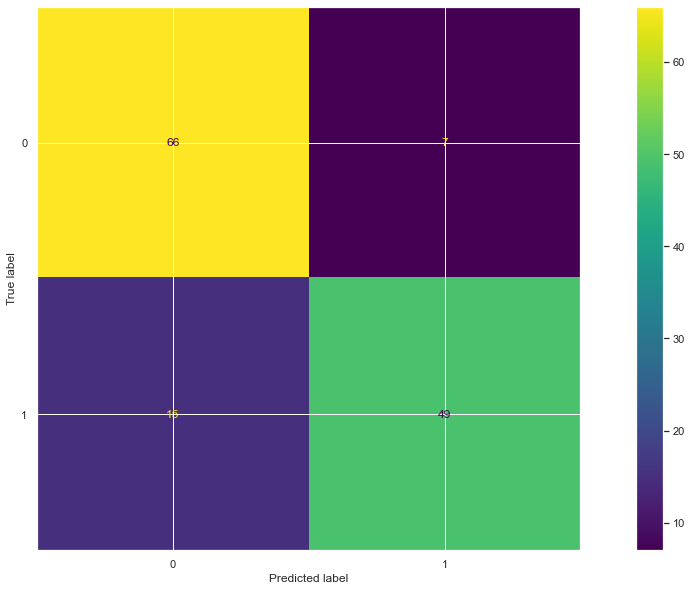

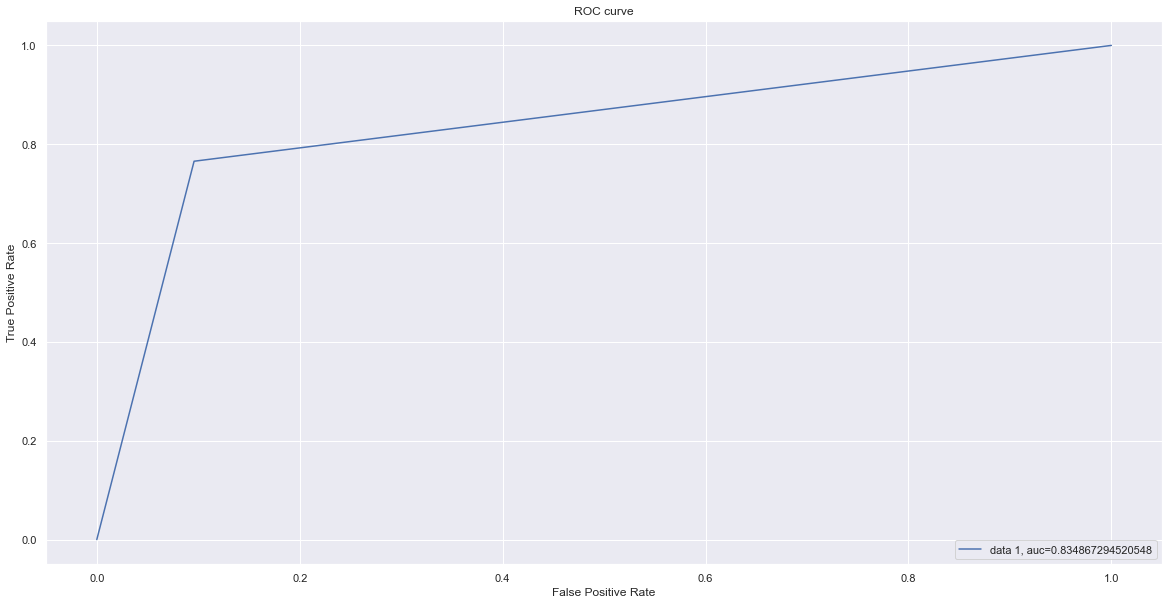

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        73
           1       0.88      0.77      0.82        64

    accuracy                           0.84       137
   macro avg       0.84      0.83      0.84       137
weighted avg       0.84      0.84      0.84       137



In [72]:
def NB_Classifier(X_train, X_test, y_train, y_test):

    # instanciraj i treniraj model 
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ######## Preporučeni način validiranja modela je korištenjem unakrsne provjere ########
    # unakrsna valicadija
    scores = cross_val_score(model, X, y, cv=10)
    
    
    # evaluiraj model
    print('Točnost: ', scores.mean(), ' +- ', scores.std())
    
    # izračun točnosti modela
    print('Accuracy of the Decision Tree algorithm is: {}'.format(accuracy_score(y_test,y_pred)))
    
    # matrica zabune
    print('Confusion matrix:\n {}'.format(confusion_matrix(y_test,y_pred)))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()
    
    # Pojedinačni prikaz metrika
    print("Precision Score : ",precision_score(y_test,y_pred,average='micro'))
    print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))
    print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
    print("\n")
    
    # classification report
    print(classification_report(y_test,y_pred))
    
    # ROC krivulja
    figure()
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    #Classification report
    print(classification_report(y_test,y_pred))
    
# pozovi definiranu funkciju
NB_Classifier(X_train, X_test, y_train, y_test)

### Logistic regression classifier

Točnost:  0.7946291560102302  +-  0.10010614464060917
Accuracy of the Decision Tree algorithm is: 0.8394160583941606
Confusion matrix:
 [[67  6]
 [16 48]]
Precision Score :  0.8394160583941606
Recall Score :  0.8394160583941606
F1_score:  0.8394160583941606


              precision    recall  f1-score   support

           0       0.81      0.92      0.86        73
           1       0.89      0.75      0.81        64

    accuracy                           0.84       137
   macro avg       0.85      0.83      0.84       137
weighted avg       0.85      0.84      0.84       137



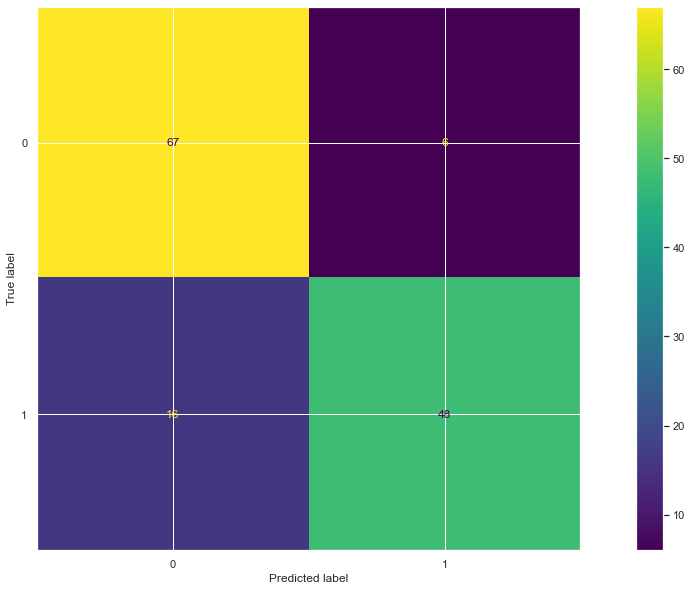

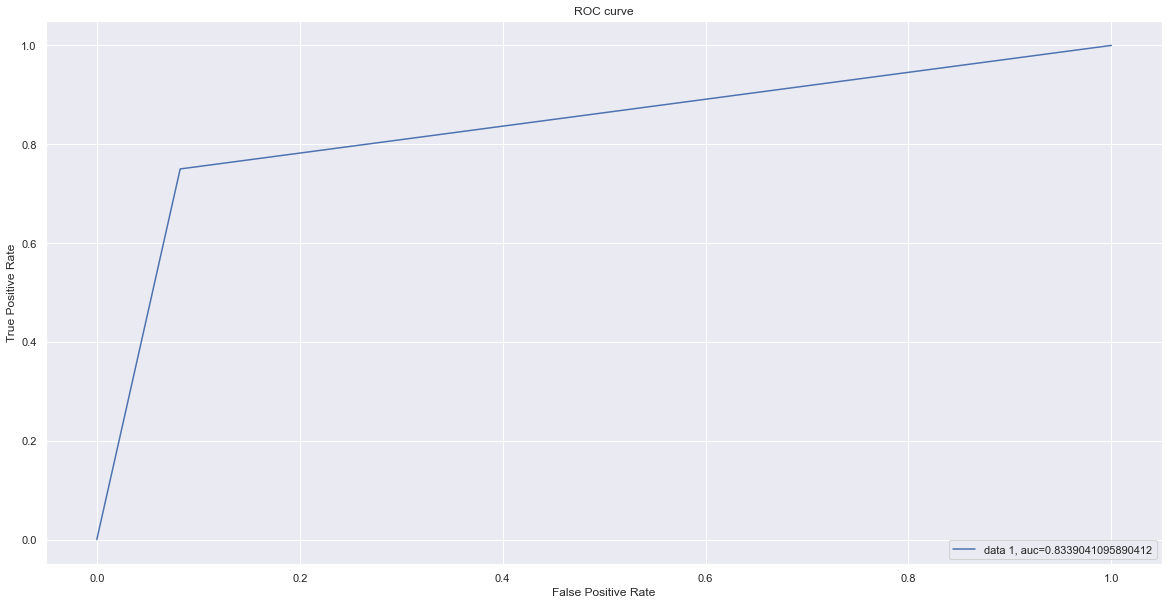

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        73
           1       0.89      0.75      0.81        64

    accuracy                           0.84       137
   macro avg       0.85      0.83      0.84       137
weighted avg       0.85      0.84      0.84       137



In [73]:
def LR_Classifier(X_train, X_test, y_train, y_test):

    # instanciraj i treniraj model 
    model = LogisticRegression(max_iter = 2000, C = 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ######## Preporučeni način validiranja modela je korištenjem unakrsne provjere ########
    # unakrsna valicadija
    scores = cross_val_score(model, X, y, cv=10)
    
    
    # evaluiraj model
    print('Točnost: ', scores.mean(), ' +- ', scores.std())
    
    # izračun točnosti modela
    print('Accuracy of the Decision Tree algorithm is: {}'.format(accuracy_score(y_test,y_pred)))
    
    # matrica zabune
    print('Confusion matrix:\n {}'.format(confusion_matrix(y_test,y_pred)))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()
    
    # Pojedinačni prikaz metrika
    print("Precision Score : ",precision_score(y_test,y_pred,average='micro'))
    print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))
    print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
    print("\n")
    
    # classification report
    print(classification_report(y_test,y_pred))
    
    # ROC krivulja
    figure()
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    #Classification report
    print(classification_report(y_test,y_pred))
   
# pozovi definiranu funkciju
LR_Classifier(X_train, X_test, y_train, y_test)


### Random forest Classifier

Točnost:  0.762382779198636  +-  0.09744633595456915
Accuracy of the Decision Tree algorithm is: 0.8102189781021898
Confusion matrix:
 [[65  8]
 [18 46]]
Precision Score :  0.8102189781021898
Recall Score :  0.8102189781021898
F1_score:  0.8102189781021898


              precision    recall  f1-score   support

           0       0.78      0.89      0.83        73
           1       0.85      0.72      0.78        64

    accuracy                           0.81       137
   macro avg       0.82      0.80      0.81       137
weighted avg       0.82      0.81      0.81       137



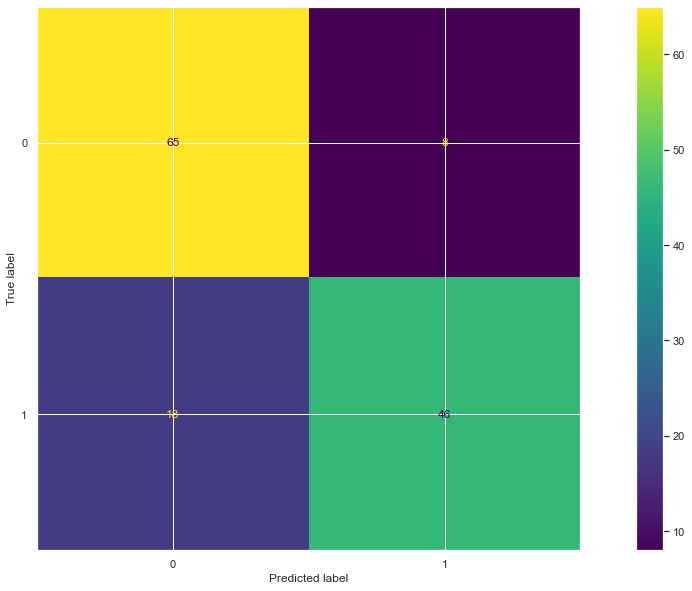

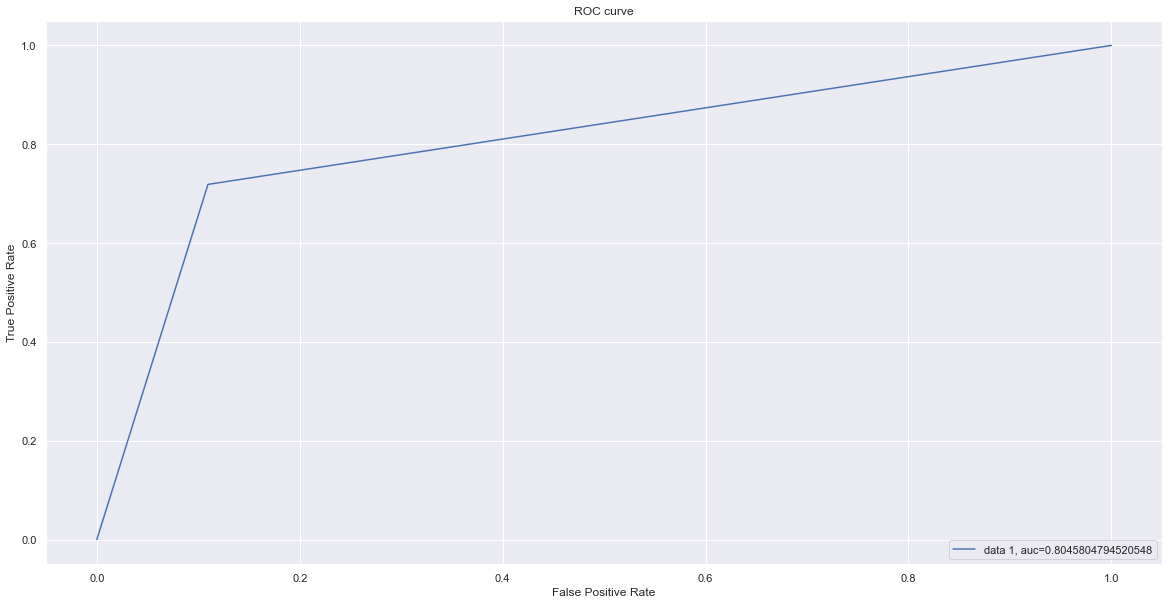

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        73
           1       0.85      0.72      0.78        64

    accuracy                           0.81       137
   macro avg       0.82      0.80      0.81       137
weighted avg       0.82      0.81      0.81       137



In [74]:
def RF_Classifier(X_train, X_test, y_train, y_test):
    
    # instanciraj i treniraj model 
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ######## Preporučeni način validiranja modela je korištenjem unakrsne provjere ########
    # unakrsna valicadija
    scores = cross_val_score(model, X, y, cv=10)
    
    
    # evaluiraj model
    print('Točnost: ', scores.mean(), ' +- ', scores.std())
    
    # izračun točnosti modela
    print('Accuracy of the Decision Tree algorithm is: {}'.format(accuracy_score(y_test,y_pred)))
    
    # matrica zabune
    print('Confusion matrix:\n {}'.format(confusion_matrix(y_test,y_pred)))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()
    
    # Pojedinačni prikaz metrika
    print("Precision Score : ",precision_score(y_test,y_pred,average='micro'))
    print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))
    print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
    print("\n")
    
    # classification report
    print(classification_report(y_test,y_pred))
    
    # ROC krivulja
    figure()
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    #Classification report
    print(classification_report(y_test,y_pred))
   
# pozovi definiranu funkciju
RF_Classifier(X_train, X_test, y_train, y_test)

### SVM (support vector machines) Classifer

Točnost:  0.6803282182438193  +-  0.06899470775198902
Accuracy of the Decision Tree algorithm is: 0.7299270072992701
Confusion matrix:
 [[63 10]
 [27 37]]
Precision Score :  0.7299270072992701
Recall Score :  0.7299270072992701
F1_score:  0.72992700729927


              precision    recall  f1-score   support

           0       0.70      0.86      0.77        73
           1       0.79      0.58      0.67        64

    accuracy                           0.73       137
   macro avg       0.74      0.72      0.72       137
weighted avg       0.74      0.73      0.72       137



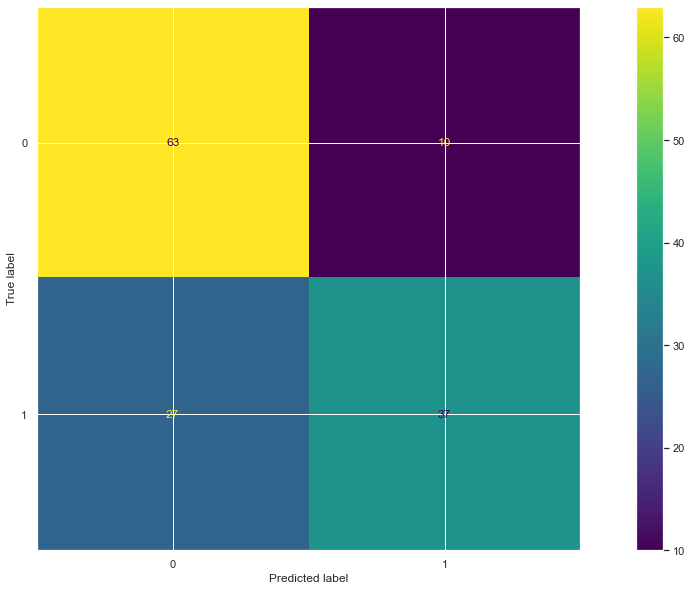

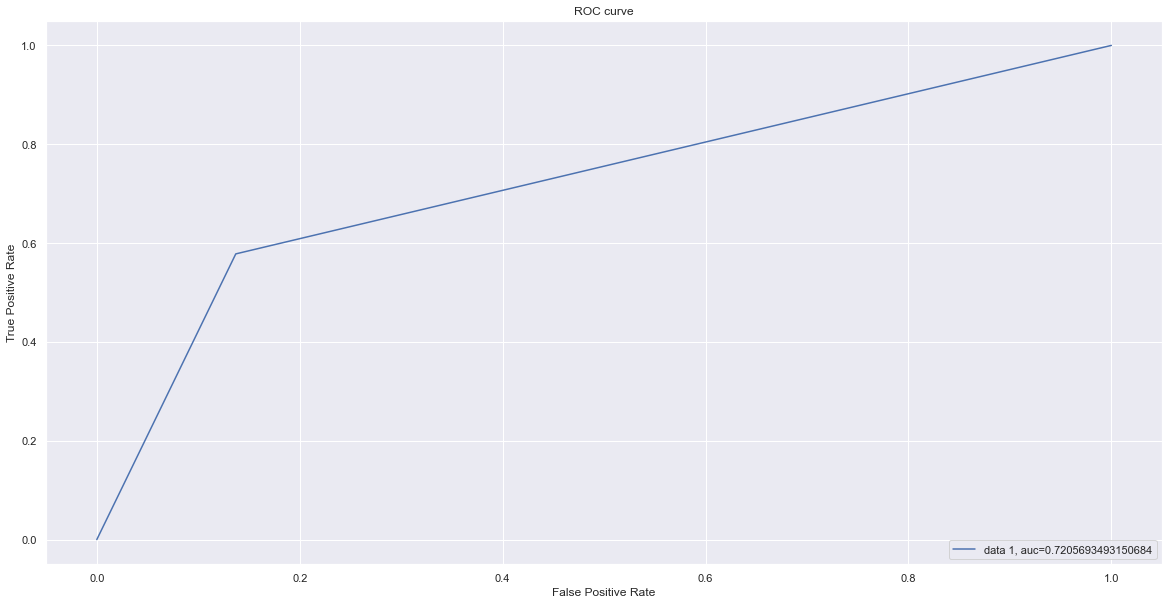

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        73
           1       0.79      0.58      0.67        64

    accuracy                           0.73       137
   macro avg       0.74      0.72      0.72       137
weighted avg       0.74      0.73      0.72       137



In [78]:
def SVM_Classifier(df):
    
    # instanciraj i treniraj model 
    model = svm.SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    ######## Preporučeni način validiranja modela je korištenjem unakrsne provjere ########
    # unakrsna valicadija
    scores = cross_val_score(model, X, y, cv=10)
    
    # evaluiraj model
    print('Točnost: ', scores.mean(), ' +- ', scores.std())
    
    # izračun točnosti modela
    print('Accuracy of the Decision Tree algorithm is: {}'.format(accuracy_score(y_test,y_pred)))
    
    # matrica zabune
    print('Confusion matrix:\n {}'.format(confusion_matrix(y_test,y_pred)))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()
    
    # Pojedinačni prikaz metrika
    print("Precision Score : ",precision_score(y_test,y_pred,average='micro'))
    print("Recall Score : ",recall_score(y_test, y_pred,average='micro'))
    print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
    print("\n")
    
    # classification report
    print(classification_report(y_test,y_pred))
    
    # ROC krivulja
    figure()
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title("ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    #Classification report
    print(classification_report(y_test,y_pred))
   
# pozovi definiranu funkciju
SVM_Classifier(X_tmp)